**Importing Python libraries.**

In [ ]:
# Importing Python libraries

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow import keras
from PIL import Image
from matplotlib.image import imread
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

**Mounting the google drive account, and set the dataset directories.**

In [ ]:
drive.mount('/content/drive')
data_directory = '/content/drive/MyDrive/AV_seminar/Classification/kaggle_dataset'
train_directory = '/content/drive/MyDrive/AV_seminar/Classification/kaggle_dataset/Train'
test_directory = '/content/drive/MyDrive/AV_seminar/Classification/kaggle_dataset/Test'

Mounted at /content/drive


In [ ]:
# Giving names for all 43 classes

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

values = classes.values()
values_list = list(values)

keys = classes.keys()
keys_list = list(keys)

print(values_list[:5])
print(keys_list[:5])

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)']
[0, 1, 2, 3, 4]


**Loading the training images from "Train" folder and add them into a list**

In [ ]:
files = os.listdir(train_directory)
number_of_classes = len(files)
image_data = []
image_labels = []
HEIGHT = 32
WIDTH = 32
from PIL import Image

for i in range(number_of_classes):
    path = data_directory + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image)
            resize_image = image_fromarray.resize((HEIGHT, WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

In [ ]:
# Converting the list to numpy array

image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Saving the "image_data" and "image_labels" in a directory as npy file

np.save('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/train_data.npy', image_data)
np.save('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/train_labels.npy', image_labels)

In [ ]:
# Loading the "image_data" and "image_labels" from a directory as npy file

train_image_data = np.load('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/train_data.npy')
train_image_labels = np.load('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/train_labels.npy')
print(type(train_image_data))
print(type(train_image_labels))
print("Shape of training images data tensor: {}".format(train_image_data.shape))
print("Shape of training labels tensor: {}".format(train_image_labels.shape))
print("Number of training images: {}".format(train_image_data.shape[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Shape of training images data tensor: (39209, 32, 32, 3)
Shape of training labels tensor: (39209,)
Number of training images: 39209


Image class number: 38 (Keep right)


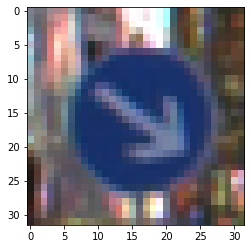

In [ ]:
# Plotting a random image from training data with its label

random_number = np.random.randint(0, train_image_data.shape[0]) #Generate a random number between 0 and 39209
print("Image class number: {} ({})".format(train_image_labels[random_number], classes[train_image_labels[random_number]]))
plt.imshow(cv2.cvtColor(train_image_data[random_number], cv2.COLOR_BGR2RGB))

In [ ]:
# Getting the number of training images for each class.

files = os.listdir(train_directory)
number_of_classes = len(files)
total_lengths = []
print("Number of Classes: {}".format(number_of_classes))
for i in range(number_of_classes):
  lengths = len(os.listdir(train_directory + '/' + str(i)))
  total_lengths.append(lengths)
  print('The total number of training images for class ({}) :'.format(i), lengths)

Number of Classes: 43
The total number of training images for class (0) : 210
The total number of training images for class (1) : 2220
The total number of training images for class (2) : 2250
The total number of training images for class (3) : 1410
The total number of training images for class (4) : 1980
The total number of training images for class (5) : 1860
The total number of training images for class (6) : 420
The total number of training images for class (7) : 1440
The total number of training images for class (8) : 1410
The total number of training images for class (9) : 1470
The total number of training images for class (10) : 2010
The total number of training images for class (11) : 1320
The total number of training images for class (12) : 2100
The total number of training images for class (13) : 2160
The total number of training images for class (14) : 780
The total number of training images for class (15) : 630
The total number of training images for class (16) : 420
The tot

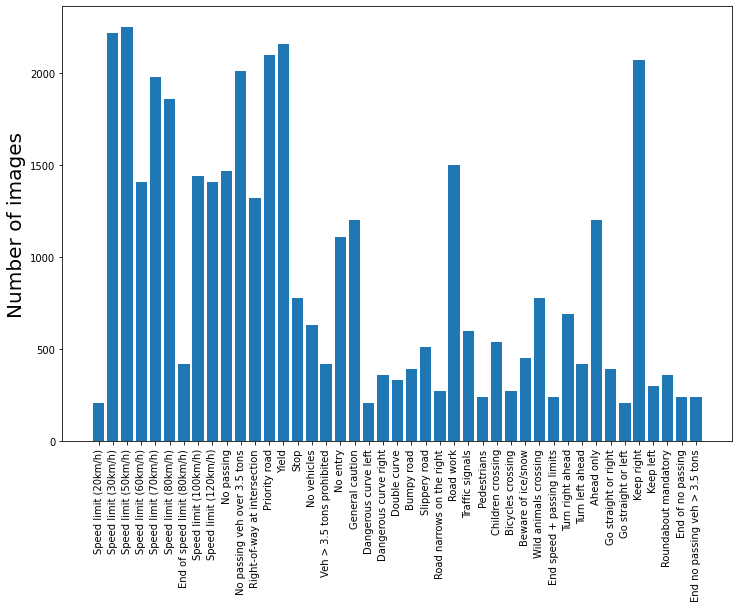

In [ ]:
# Plotting a bar that shows the histogram for the number of each class for training dataset.

train_number = []
category_name = []

for file in files:
    train_files = os.listdir(train_directory + '/' + file)
    train_number.append(len(train_files))
    category_name.append(classes[int(file)])

fig = plt.figure(figsize=(12,8))
plt.bar(values_list,total_lengths)
plt.xticks(values_list, rotation='vertical', fontsize=10)
plt.ylabel("Number of images", fontsize=20)
plt.show()
#Saving the plot in the working directory
# plt.tight_layout()
# plt.savefig("images_number_histogram.jpg")

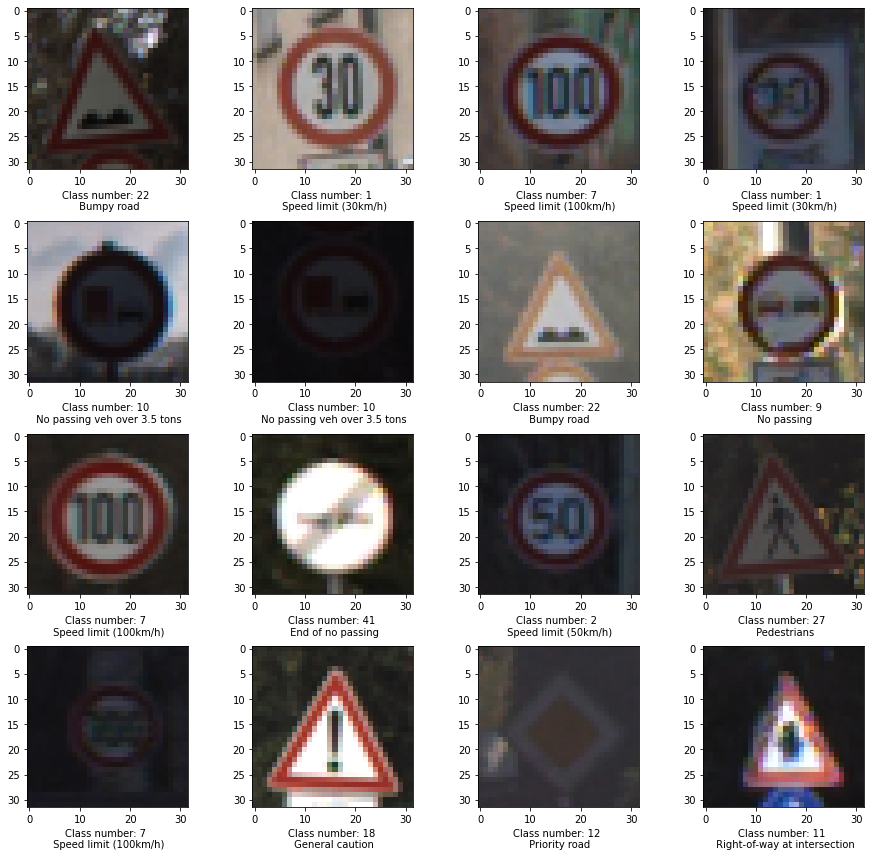

In [ ]:
# Plotting random images from training data to see an overview how the data looks like.

plt.figure(figsize=(15,15))

imgs = train_image_data
CLASS = train_image_labels

for i in range(1,17):
    plt.subplot(4,4,i)
    index = np.random.randint(0, len(imgs))
    plt.imshow(cv2.cvtColor(imgs[index], cv2.COLOR_BGR2RGB))
    plt.xlabel('Class number: {} \n {}'.format(CLASS[index], values_list[CLASS[index]]), fontsize = 10)

plt.subplots_adjust(wspace = 0.4)

**Loading the test images from "Test" folder using Test.csv file and adding them into a list**

In [ ]:
# Loading the test dataset and its labels into numpy arrays 

test_data = []
test_dataFrame = pd.read_csv(data_directory + '/Test.csv')
imgs = test_dataFrame["Path"].values
labels = test_dataFrame["ClassId"].values

for img in imgs:
        try:
            image = cv2.imread(data_directory + '/' + img)
            image_fromarray = Image.fromarray(image)
            resize_image = image_fromarray.resize((HEIGHT, WIDTH))
            test_data.append(np.array(resize_image))
        except:
            print("Error in " + img)


In [ ]:
# Convert the list to numpy array

X_test = np.array(test_data)
labels = np.array(labels)

# Save the "X_test" and "labels" in a directory as npy file

np.save('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/test_data.npy', X_test)
np.save('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/test_labels.npy', labels)

In [ ]:
# Load the "X_test" and "labels" from a directory as npy file

X_test_data = np.load('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/test_data.npy')
test_labels = np.load('/content/drive/MyDrive/AV_seminar/Classification/data_as_np_arrays/test_labels.npy')
print(type(X_test_data))
print(type(test_labels))
print("Shape of testing images data tensor: {}".format(X_test_data.shape))
print("Shape of testing labels tensor: {}".format(test_labels.shape))
print("Number of testing images: {}".format(X_test.shape[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Shape of testing images data tensor: (12630, 32, 32, 3)
Shape of testing labels tensor: (12630,)
Number of testing images: 12630


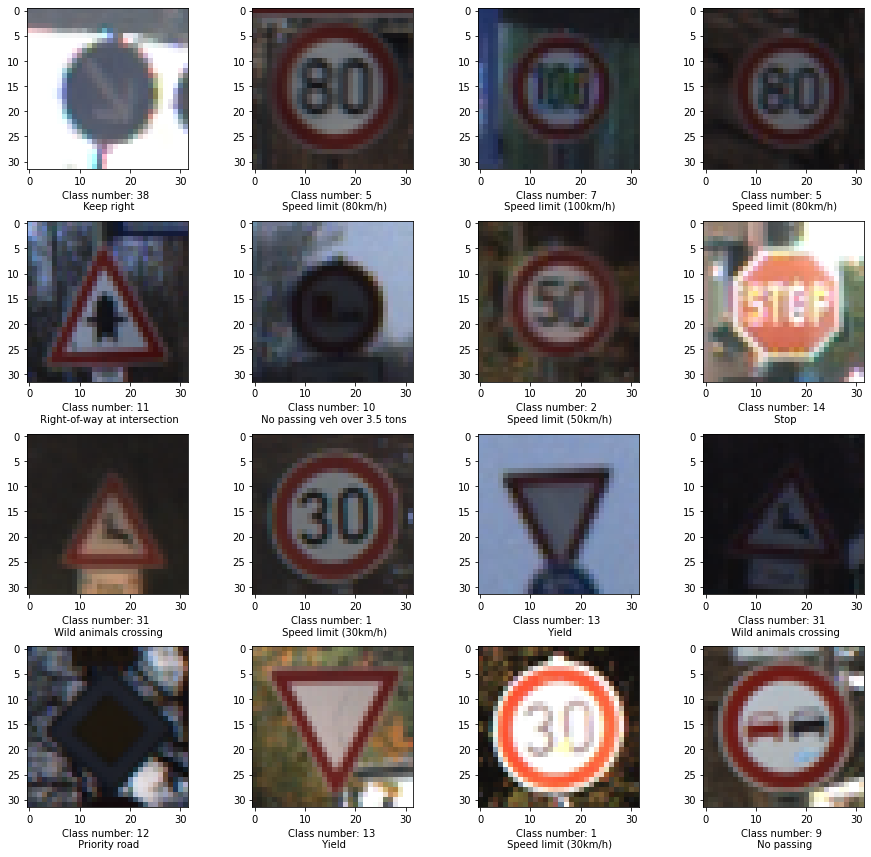

In [ ]:
# Plotting random images from testing data to see an overview how the data looks like.

plt.figure(figsize=(15,15))

imgs = X_test_data
CLASS = test_labels

for i in range(1,17):
    plt.subplot(4,4,i)
    index = np.random.randint(0, len(imgs))
    plt.imshow(cv2.cvtColor(imgs[index], cv2.COLOR_BGR2RGB))
    plt.xlabel('Class number: {} \n {}'.format(CLASS[index], values_list[CLASS[index]]), fontsize = 10)

plt.subplots_adjust(wspace = 0.4)

**Data Preprocessing**

In [ ]:
def to_gray(data):
  data = np.sum(data/3, axis = 3, keepdims = True)
  return data

def normalize(data):
  data = data/255.0
  return data


In [ ]:
# Preprocessing training data

X_train_gray = to_gray(train_image_data)
X_train_gray_norm = normalize(X_train_gray)
print("Shape of training data after preprocessing: {}".format(X_train_gray_norm.shape))

Shape of training data after preprocessing: (39209, 32, 32, 1)


In [ ]:
# Preprocessing testing data

X_test_gray = to_gray(X_test)
X_test_gray_norm = normalize(X_test_gray)
print("Shape of testing data after preprocessing: {}".format(X_test_gray_norm.shape))

Shape of testing data after preprocessing: (12630, 32, 32, 1)


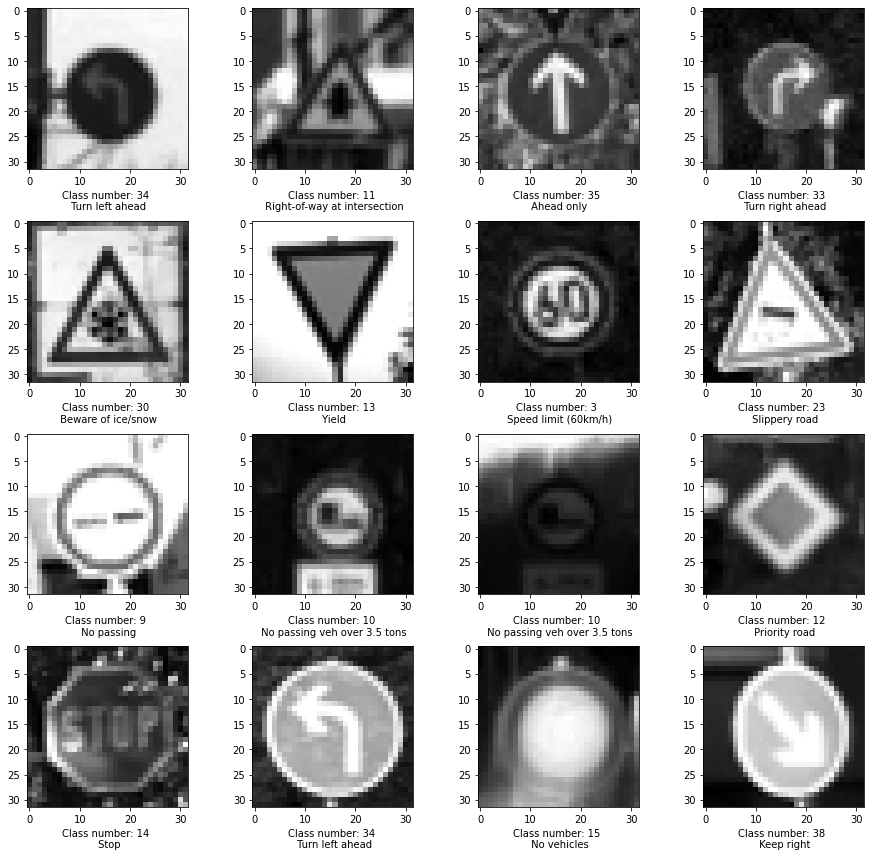

In [ ]:
# Plotting random images from training data after preprocessing.

plt.figure(figsize=(15,15))

for i in range(1, 17):
    plt.subplot(4,4,i)
    random_index = np.random.randint(0, X_train_gray_norm.shape[0])
    random_image = X_train_gray_norm[random_index]
    image_class = train_image_labels[random_index]
    plt.imshow(random_image.squeeze(), cmap='gray')
    plt.xlabel('Class number: {} \n {}'.format(image_class, values_list[image_class]), fontsize = 10)

plt.subplots_adjust(wspace = 0.4)

In [ ]:
# Shuffling the data and split it to training and validation 

X_shuffled, y_shuffled = shuffle(X_train_gray_norm, train_image_labels)
X_train, X_validation, train_labels, validation_labels = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

print("X_train Shape: {}".format(X_train.shape))
print("X_Validation Shape: {}".format(X_validation.shape))
print("y_train Shape: {}".format(train_labels.shape))
print("y_Validation Shape: {}".format(validation_labels.shape))

X_train Shape: (31367, 32, 32, 1)
X_Validation Shape: (7842, 32, 32, 1)
y_train Shape: (31367,)
y_Validation Shape: (7842,)


In [ ]:
# Converting the labels to categorical form with one hot encoding

print("y_train Shape before applying OneHotEncoder:      {}".format(train_labels.shape))
print("y_validation Shape befor applying OneHotEncoder: {}".format(validation_labels.shape))
print("y_test Shape befor applying OneHotEncoder: {}".format(test_labels.shape))

y_train = keras.utils.to_categorical(train_labels, number_of_classes)
y_validation = keras.utils.to_categorical(validation_labels, number_of_classes)
y_test = keras.utils.to_categorical(test_labels, number_of_classes)

print("\ny_train Shape after applying OneHotEncoder:      {}".format(y_train.shape))
print("y_validation Shape after applying OneHotEncoder: {}".format(y_validation.shape))
print("y_test Shape after applying OneHotEncoder: {}".format(y_test.shape))

y_train Shape before applying OneHotEncoder:      (31367,)
y_validation Shape befor applying OneHotEncoder: (7842,)
y_test Shape befor applying OneHotEncoder: (12630,)

y_train Shape after applying OneHotEncoder:      (31367, 43)
y_validation Shape after applying OneHotEncoder: (7842, 43)
y_test Shape after applying OneHotEncoder: (12630, 43)


**Building the CNN archeticture**

In [ ]:
HEIGHT = 32
WIDTH = 32

In [ ]:
model = tf.keras.models.Sequential([
                                    
    # This is the first convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(HEIGHT, WIDTH, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Dropout layer
    tf.keras.layers.Dropout(rate=0.3),
    
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Dropout layer
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')
])


In [ ]:
# Getting summary of the network architecture

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

In [ ]:
# Compiling the model

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 128

model.fit(x=X_train, 
          y=y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_data=(X_validation, y_validation))

Epoch 1/10
246/246 [==============================] - 109s 437ms/step - loss: 1.5296 - accuracy: 0.5813 - val_loss: 0.2587 - val_accuracy: 0.9296
Epoch 2/10
246/246 [==============================] - 109s 442ms/step - loss: 0.2502 - accuracy: 0.9246 - val_loss: 0.0814 - val_accuracy: 0.9781
Epoch 3/10
246/246 [==============================] - 107s 434ms/step - loss: 0.1225 - accuracy: 0.9629 - val_loss: 0.0566 - val_accuracy: 0.9862
Epoch 4/10
246/246 [==============================] - 106s 432ms/step - loss: 0.0837 - accuracy: 0.9735 - val_loss: 0.0408 - val_accuracy: 0.9901
Epoch 5/10
246/246 [==============================] - 108s 439ms/step - loss: 0.0651 - accuracy: 0.9797 - val_loss: 0.0363 - val_accuracy: 0.9925
Epoch 6/10
246/246 [==============================] - 106s 432ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0330 - val_accuracy: 0.9927
Epoch 7/10
246/246 [==============================] - 108s 441ms/step - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0311 -

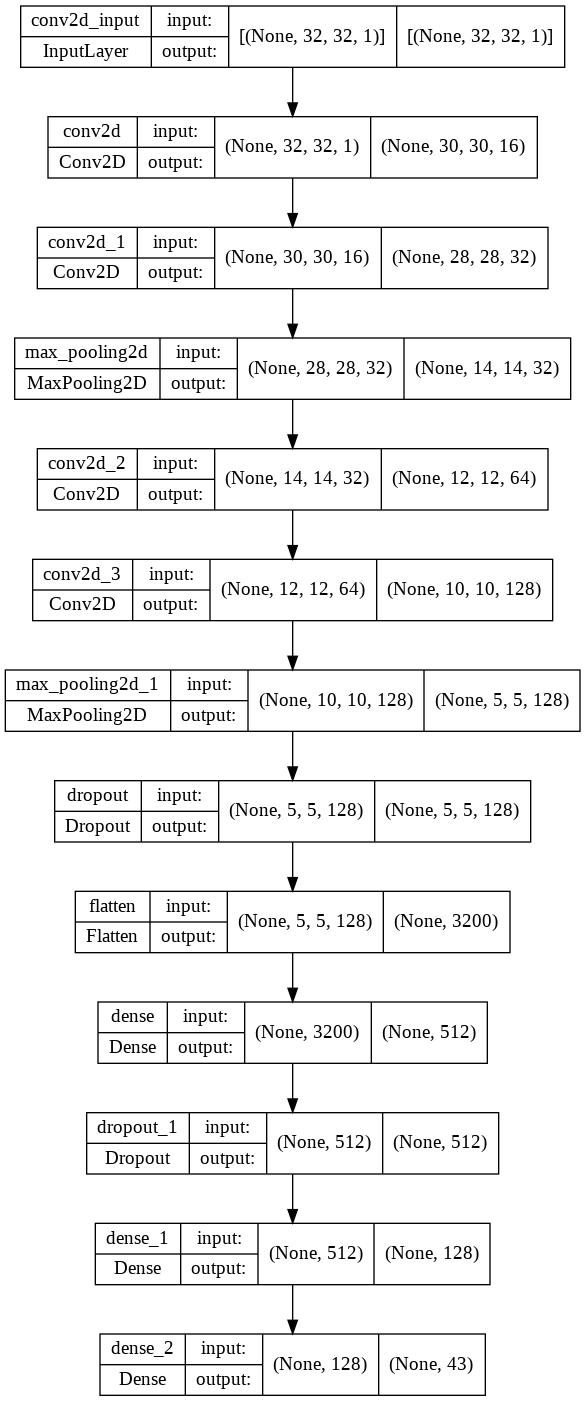

In [ ]:
#Plotting the architecture of CNN

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/AV_seminar/Classification/plots/model_plot.jpg', show_shapes=True, show_layer_names=True)

In [ ]:
# summarize history for accuracy

history = model.history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


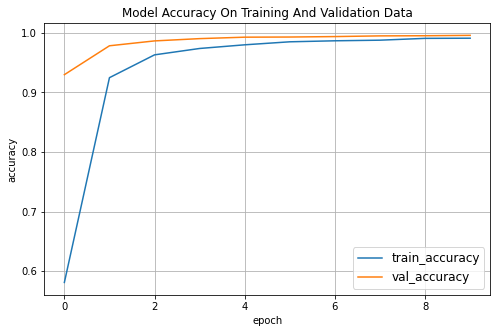

In [ ]:
# Plotting training and validation accuracy

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid(True)
plt.title('Model Accuracy On Training And Validation Data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='lower right', fontsize=12)
plt.show()

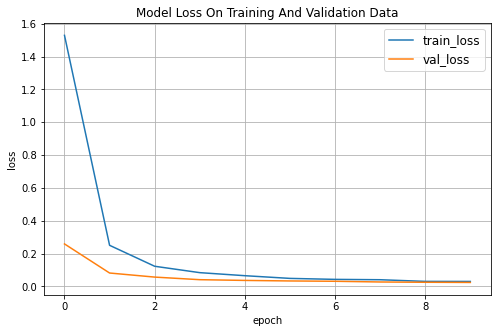

In [ ]:
# Plotting training and validation loss

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True)
plt.title('Model Loss On Training And Validation Data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right', fontsize=12)
plt.show()

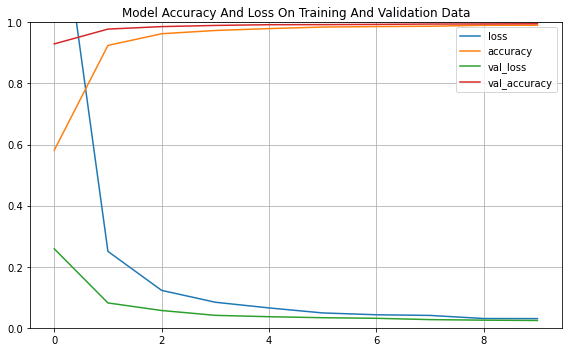

In [ ]:
# Plotting training and validation accuracy and loss

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Model Accuracy And Loss On Training And Validation Data')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/AV_seminar/Classification/plots/Model_Accuracy_And_Loss.jpg')
plt.show()

In [ ]:
# Evaluate the model

score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]*100))

395/395 [==============================] - 16s 41ms/step - loss: 0.1309 - accuracy: 0.9690
Test Accuracy: 96.90419435501099


In [ ]:
#Save the model

model.save('/content/drive/MyDrive/AV_seminar/Classification/first_model_trial/model_with_dropout_9690.h5')


In [ ]:
#Load the model

# This is another model I trained it before on the same dataset with some changes in training and validations percentages, and achieved 97.41% testing accuracy
loaded_model = keras.models.load_model('/content/drive/MyDrive/AV_seminar/Classification/first_model_trial/model_with_dropout_9741.h5')


In [ ]:
# Evaluate the loaded model

score = loaded_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]*100))

395/395 [==============================] - 11s 28ms/step - loss: 0.1180 - accuracy: 0.9741
Test Accuracy: 97.41092920303345


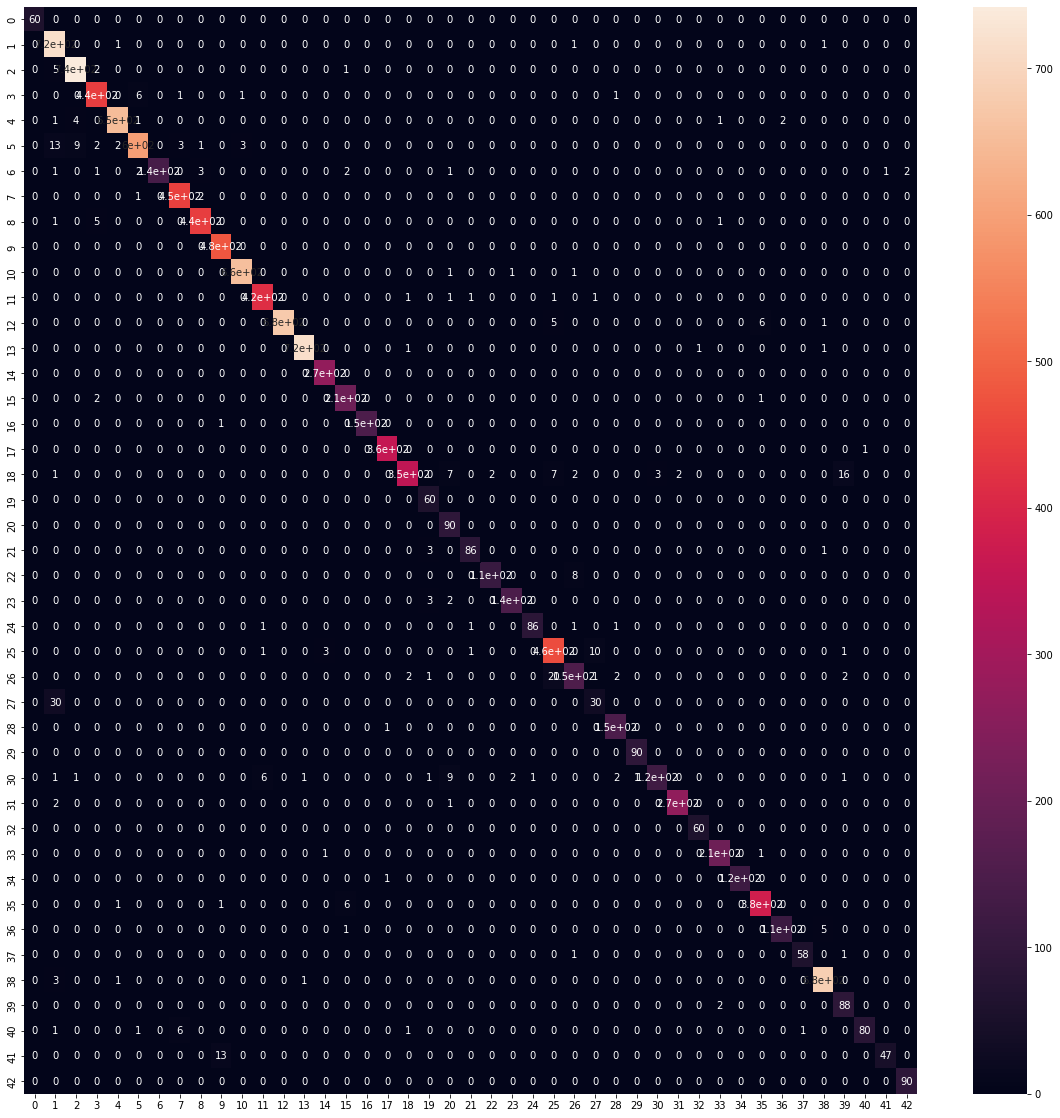

In [ ]:
# Plotting the confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (20, 20))

predict_x = loaded_model.predict(X_test_gray_norm) 
predicted_classes = np.argmax(predict_x,axis=1)
y_true=np.argmax(y_test,axis=1)

conf_matrix = confusion_matrix(y_true, predicted_classes)
sns.heatmap(conf_matrix, annot = True)

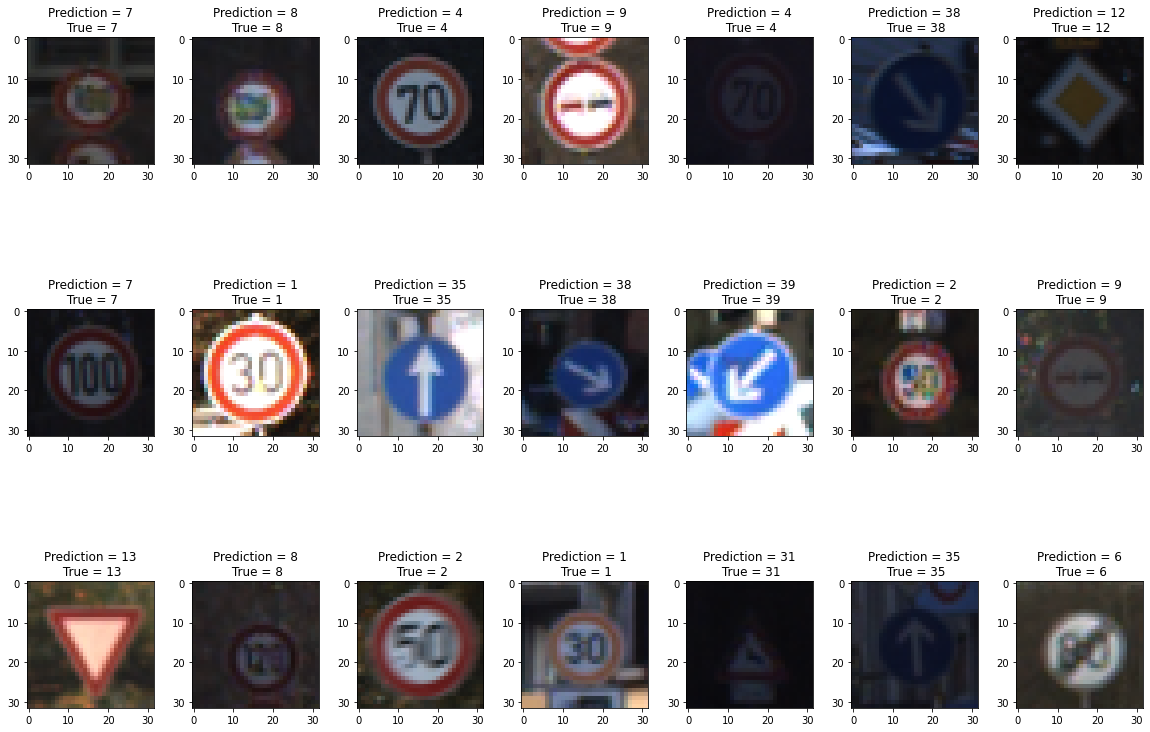

In [ ]:
# Plotting some resulted test images with the true and predicted labels

L = 3
W = 7

fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    random_index = np.random.randint(0, X_test.shape[0])
    random_image = X_test_data[random_index]
    random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(random_image.squeeze())
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[random_index], y_true[random_index]))

plt.subplots_adjust(wspace = 0.3, hspace = -0.5)


In [ ]:
# Loading and resizing new test images
new_test_images = []
path = '/content/drive/MyDrive/AV_seminar/Classification/test_for_classification/'
for image in os.listdir(path):
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_test_images.append(img)
print("Number of new testing examples: ", len(new_test_images))

Number of new testing examples:  10


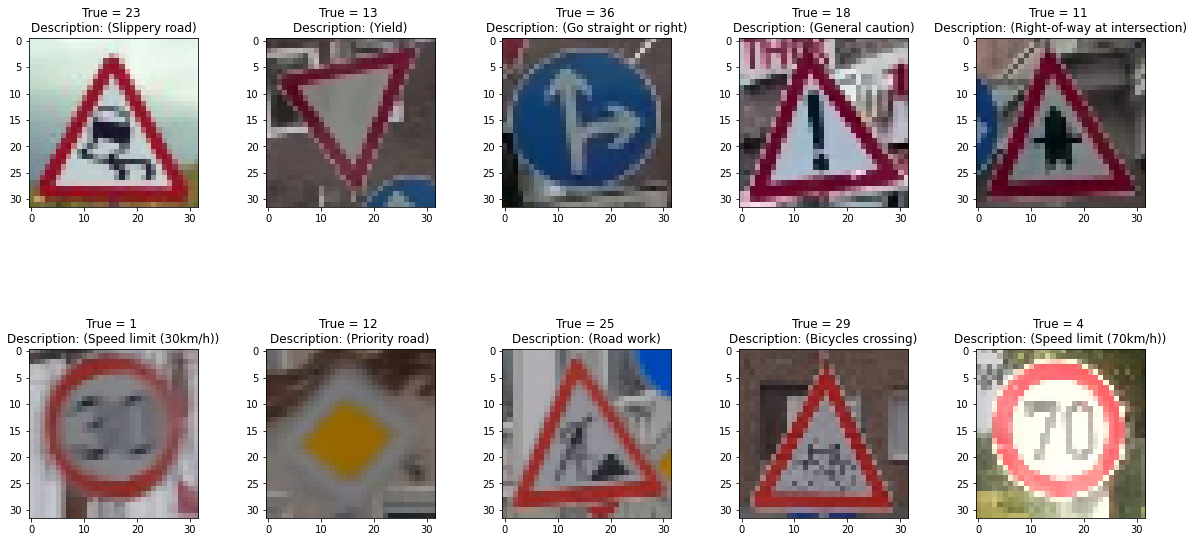

In [ ]:
# Plotting new test images

L = 2
W = 5
true_classes = [23, 13, 36, 18, 11, 1, 12, 25, 29, 4]

fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    image = new_test_images[i]
    axes[i].imshow(image.squeeze())
    axes[i].set_title('True = {} \nDescription: ({})'.format(true_classes[i], classes[true_classes[i]]))

plt.subplots_adjust(wspace = 0.4, hspace = -0.6)


In [ ]:
# Preprocess the new test data

new_test_images = np.array(new_test_images)
print("Data shape before preprocessing: {}".format(new_test_images.shape))
new_test_images_gray = to_gray(new_test_images)
new_test_images_gray_norm = normalize(new_test_images_gray)
y_test_new = keras.utils.to_categorical(true_classes, number_of_classes)
print("Data shape after preprocessing: {}".format(new_test_images_gray_norm.shape))
print("labels shape after the converting to categorical: {}".format(y_test_new.shape))

Data shape before preprocessing: (10, 32, 32, 3)
Data shape after preprocessing: (10, 32, 32, 1)
labels shape after the converting to categorical: (10, 43)


In [ ]:
predict_x_new=loaded_model.predict(new_test_images_gray_norm) 
classes_x=np.argmax(predict_x_new,axis=1)
y_true=np.argmax(y_test_new,axis=1)
print(classes_x[0])
print(y_true[0])

30
23


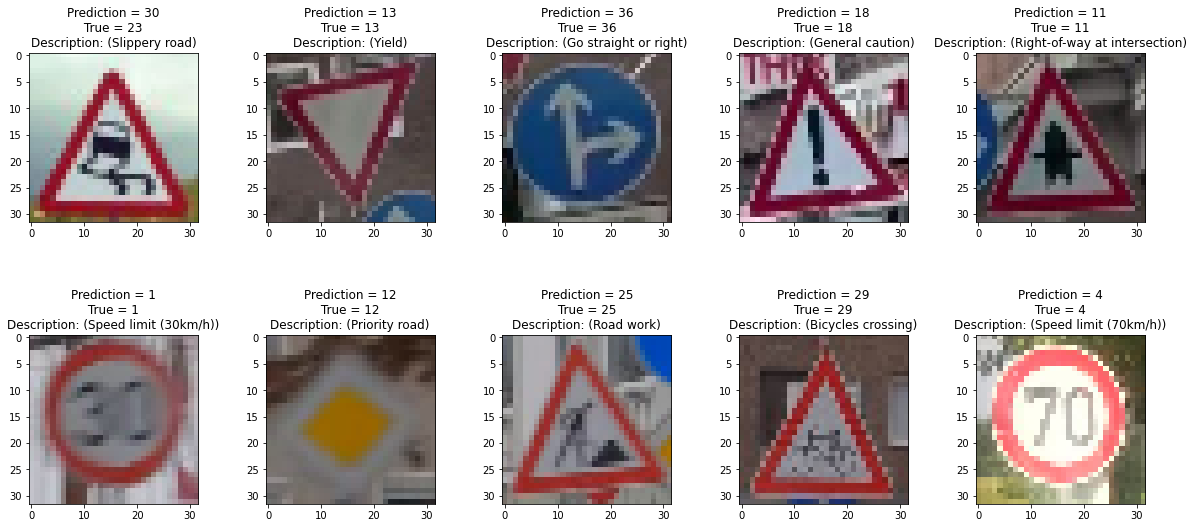

In [ ]:
# Plotting the new test data with its predicted and true classes, WE SEE here the the first images is misclassified

L = 2
W = 5

fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    image = new_test_images[i]
    axes[i].imshow(image)
    axes[i].set_title('Prediction = {}\n True = {} \nDescription: ({})'.format(classes_x[i], y_true[i], classes[true_classes[i]]))

plt.subplots_adjust(wspace = 0.4, hspace = -0.65)